In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
#from sqlalchemy import desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
inspector = inspect(engine)

In [10]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Find the most recent date in the data set.
date = session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1)
for i in date:
    print(f'The most recent date in data set is {i}.')

The most recent date in data set is ('2017-08-23',).


In [13]:
#query for precipation in last 12 months of data
past_year = session.query(Measurement.date, Measurement.prcp).where(Measurement.date >= '2016-08-23')

#create lists of dates and precipitation
date_list = []
prcp_list = []

for i in past_year:
    #print(i)
    date = i[0]
    prcp = i[1]
    
    date_list.append(date)
    prcp_list.append(prcp)

#create data frame from date and precipitation lists and sort by date
prcp_df = pd.DataFrame(list(zip(date_list, prcp_list)), columns=['date', 'prcp']).sort_values(by='date')

#set index to date
prcp_df = prcp_df.set_index('date')

#remove NaN values from df
prcp_df = prcp_df.dropna(how='any')

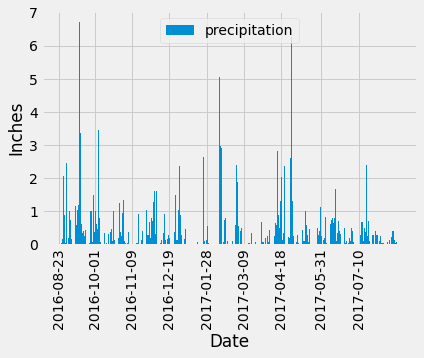

<Figure size 1800x1440 with 0 Axes>

In [28]:
#create plot
plt.bar(prcp_df.index, prcp_df['prcp'], linewidth=25)

plt.ylabel('Inches')
plt.xlabel('Date')

plt.xticks(rotation='vertical')
plt.xticks(['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28',
            '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10'  ])

legend = 'precipitation',

plt.legend(legend, loc='upper center')
plt.figure(figsize=(25,20))

plt.show()

In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()